# **Population and Migration Data Analysis**
---

## *Introduction*
This notebook analyzes population growth and migration trends using historical data from *1960* to *2023*. It explores how population distributions and migration patterns have evolved, highlighting key insights such as growth rates and demographic changes. This study provides a clearer picture of how global demographics have shifted over the decades, influenced by various socioeconomic and political factors.

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Load the datasets
population_data = pd.read_csv('world_bank_population.csv')
migration_data = pd.read_csv('world_bank_migration.csv')

# Extract the list of year columns
year_columns = population_data.columns[4:]

# Melt the data to long format
population_data_long = population_data.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], value_vars=year_columns, var_name="Year", value_name="Population")
migration_data_long = migration_data.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], value_vars=year_columns, var_name="Year", value_name="Migration Rate")

# Convert Year to integer
population_data_long['Year'] = population_data_long['Year'].astype(int)
migration_data_long['Year'] = migration_data_long['Year'].astype(int)


## *Population Distribution Across Three Key Periods*

Visualize global population *growth* and *shifts* from *1960* to *2023*.

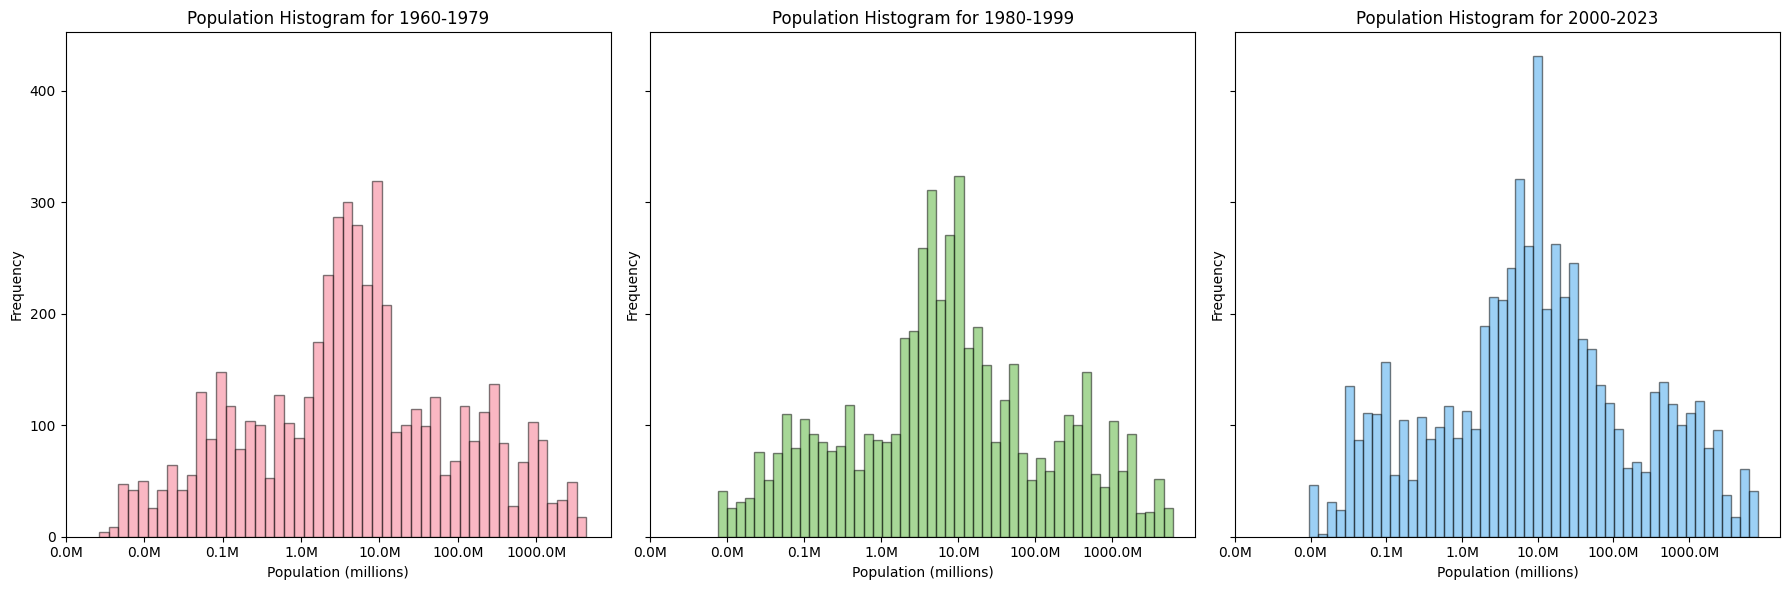

In [2]:
# Define broader time periods
time_periods = {
    "1960-1979": (1960, 1979),
    "1980-1999": (1980, 1999),
    "2000-2023": (2000, 2023)
}

# Create histograms for population distribution over the broader time periods
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define colors for each period
colors = sns.color_palette("husl", len(time_periods))

for ax, (color, (period, years)) in zip(axs, zip(colors, time_periods.items())):
    period_data = population_data_long[population_data_long['Year'].between(years[0], years[1])]
    ax.hist(np.log10(period_data['Population']), bins=50, alpha=0.5, color=color, edgecolor='black')
    ax.set_title(f'Population Histogram for {period}')
    ax.set_xlabel('Population (millions)')
    ax.set_ylabel('Frequency')
    ticks = [3, 4, 5, 6, 7, 8, 9]
    tick_labels = [f"{10**tick / 1e6:.1f}M" for tick in ticks]  # Convert to millions
    ax.set_xticks(ticks)
    ax.set_xticklabels(tick_labels)

plt.tight_layout()
plt.show()

### **Key Insights**:

#### *1960-1979*:
1. **Peak Population Range**: The highest frequency is in the range of approximately 100,000 (0.1M) to 1,000,000 (1M) people.
2. **Concentration**: Populations were more concentrated in this lower range, indicating many countries had smaller populations during this period.

#### *1980-1999*:
1. **Shifting Peak**: The peak shifts towards the range of about 1,000,000 (1M) to 10,000,000 (10M) people.
2. **Increased Variability**: There's a broader spread in the population sizes compared to the earlier period, suggesting countries started experiencing more growth.

#### *2000-2023*:
1. **Higher Population Peaks**: The most frequent populations are in the range of 10,000,000 (10M) to 100,000,000 (100M) people, showing significant growth.
2. **Wide Distribution**: The population sizes are more widely distributed, indicating a greater diversity in population sizes among countries.


### **Overall Observations**:
- **Global Growth Trend**: There's a clear trend of populations shifting towards larger sizes over the decades.
- **Increasing Diversity**: More recent years show a wider distribution of population sizes, reflecting varied growth rates and demographic changes across different countries.

---

## *Periods of Rapid Population Growth or Decline*

Analyze population growth rate over the years to identify significant changes.


In [3]:
%%capture
# Calculate annual population growth rate
population_data_long['Growth Rate'] = population_data_long.groupby('Country Code')['Population'].pct_change() * 100;


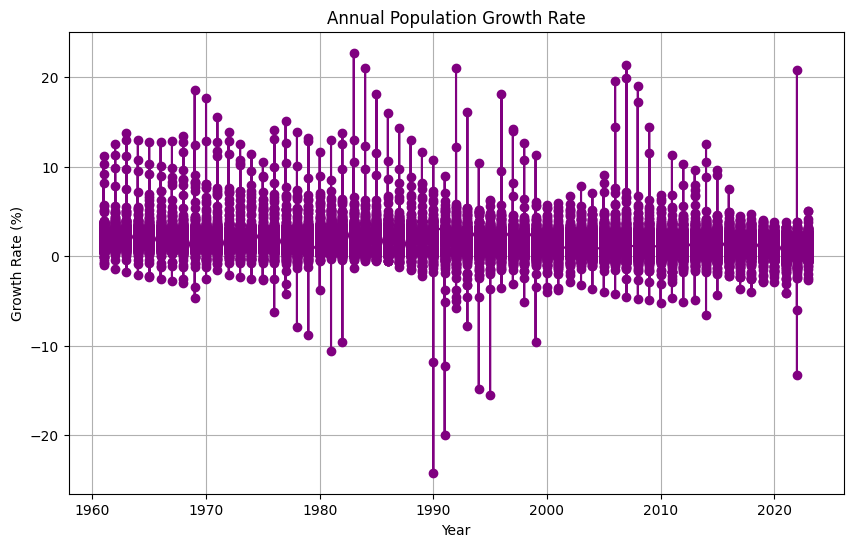

In [4]:
# Plot population growth rate over the years
plt.figure(figsize=(10, 6))
plt.plot(population_data_long['Year'], population_data_long['Growth Rate'], marker='o', linestyle='-', color='purple')
plt.title('Annual Population Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()


### **Key Insights**:

1. **Fluctuations**: The population growth rate fluctuates significantly over the 60-year period, with some years experiencing very high growth rates (above 20%) and others showing negative growth rates (below -20%).

2. **Trends**: There’s a noticeable trend of decreasing variability in growth rates over time, meaning extreme growth rates are less frequent in recent years compared to earlier decades.

3. **Economic and Policy Impacts**: These fluctuations and trends can be tied to economic, social, and policy changes across different periods, impacting everything from resource allocation to infrastructure development.

---

## *Migration Rate Trends Over Time*

Line plot showing migration rate trends over the years.


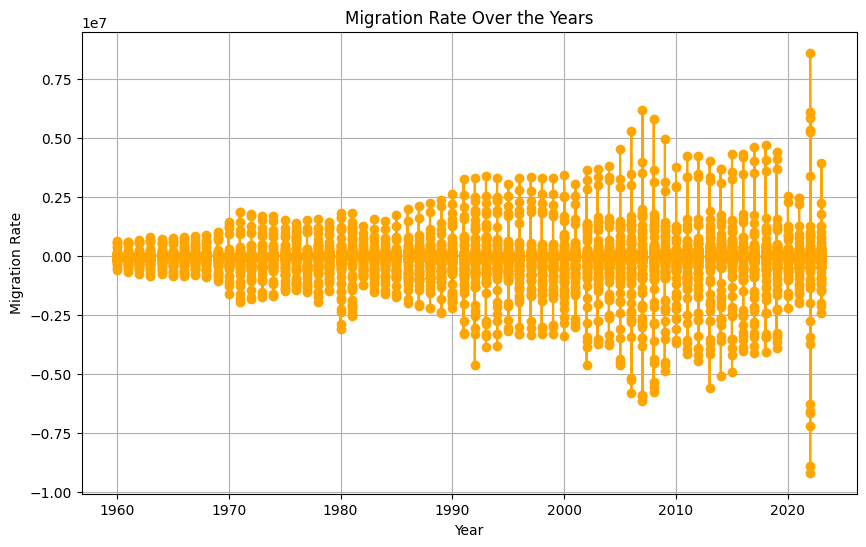

In [5]:
# Plot migration rate over the years
plt.figure(figsize=(10, 6))
plt.plot(migration_data_long['Year'], migration_data_long['Migration Rate'], marker='o', linestyle='-', color='orange')
plt.title('Migration Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Migration Rate')
plt.grid(True)
plt.show()


### **Key Insights**:

1. **Fluctuations**: Noticeable fluctuations in migration rates, with significant variations from the *1980s* onwards. This indicates periods of high immigration and emigration.

2. **Trends**: The data points show periods where the migration rates either increased or decreased significantly, suggesting changing migration patterns over time.

3. **Economic and Policy Impacts**: The peaks and troughs could be correlated with historical events, such as economic crises, wars, or changes in immigration policies.

---

## *Conclusion*
The analysis reveals a clear trend of global population growth and increasing diversity in country sizes. The histograms show a shift towards higher population ranges over time, with significant growth observed from *2000* to *2023*. Population growth rates reflect dynamic changes influenced by economic development and policy shifts, while migration rates reveal fluctuating patterns tied to historical events. These insights underscore the importance of understanding demographic changes for future planning and policy-making.